In [80]:
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition
import matplotlib.pyplot as plt
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [81]:
export_commodities_by_air = pd.read_json('./final_datasets/ea.json')
export_commodities_by_sea = pd.read_json('./final_datasets/es.json')
import_commodities_by_sea = pd.read_json('./final_datasets/is.json')
import_commodities_by_air = pd.read_json('./final_datasets/ia.json')

In [82]:
ea = pd.read_json('./final_datasets/ea.json')
es = pd.read_json('./final_datasets/es.json')
is_ = pd.read_json('./final_datasets/is.json')
ia = pd.read_json('./final_datasets/ia.json')

In [83]:
ea.shape

(20, 10)

In [84]:
model = KMeans(8)
export_commodities_by_air_y = model.fit_predict(export_commodities_by_air.drop(["Latitude", "Longitude"], axis=1))

model = KMeans(12)
export_commodities_by_sea_y = model.fit_predict(export_commodities_by_sea.drop(["Latitude", "Longitude"], axis=1))

model = KMeans(12)
import_commodities_by_sea_y = model.fit_predict(import_commodities_by_sea.drop(["Latitude", "Longitude"], axis=1))

model = AffinityPropagation()
import_commodities_by_air_y = model.fit_predict(import_commodities_by_air.drop(["Latitude", "Longitude"], axis=1))

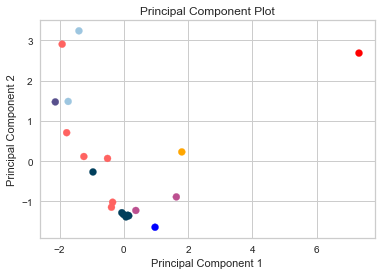

In [92]:
X = export_commodities_by_air
y = export_commodities_by_air_y

LABEL_COLOR_MAP = {
    0: 'red',
    1: 'blue',
    2: '#003f5c',
    3: '#58508d',
    4: '#bc5090',
    5: '#ff6361',
    6: '#ffa600',
    7: '#9dc6e0',
    8: '#c1e7ff',
    9: '#488f31',
    10: '#83af70',
    11: '#bad0af',
    12: '#f1f1f1',
}

label_color = [LABEL_COLOR_MAP[yi] for yi in y]

visualizer = PCADecomposition(scale=True, color=label_color)
visualizer.fit_transform(X, y)
visualizer.poof()

In [86]:
# ea
column = pd.DataFrame(export_commodities_by_air_y)
column.index = export_commodities_by_air.index
column.columns = ["Cluster Labels"]
export_commodities_by_air = export_commodities_by_air.join(column)

# es
column = pd.DataFrame(export_commodities_by_sea_y)
column.index = export_commodities_by_sea.index
column.columns = ["Cluster Labels"]
export_commodities_by_sea = export_commodities_by_sea.join(column)

# is
column = pd.DataFrame(import_commodities_by_sea_y)
column.index = import_commodities_by_sea.index
column.columns = ["Cluster Labels"]
import_commodities_by_sea = import_commodities_by_sea.join(column)

# ia
column = pd.DataFrame(import_commodities_by_air_y)
column.index = import_commodities_by_air.index
column.columns = ["Cluster Labels"]
import_commodities_by_air = import_commodities_by_air.join(column)

In [87]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)
# set color scheme for the clusters
kclusters = 8
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(export_commodities_by_air['Latitude'], export_commodities_by_air['Longitude'], export_commodities_by_air.index, export_commodities_by_air['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [88]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)
# set color scheme for the clusters
kclusters = 12
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(export_commodities_by_sea['Latitude'], export_commodities_by_sea['Longitude'], export_commodities_by_sea.index, export_commodities_by_sea['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [89]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)
# set color scheme for the clusters
kclusters = 12
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(import_commodities_by_sea['Latitude'], import_commodities_by_sea['Longitude'], import_commodities_by_sea.index, import_commodities_by_sea['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [94]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=2)
# set color scheme for the clusters
kclusters = 12
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(import_commodities_by_air['Latitude'], import_commodities_by_air['Longitude'], import_commodities_by_air.index, import_commodities_by_air['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [95]:
export_commodities_by_air.to_json('./post_analysis/ea.json')
export_commodities_by_sea.to_json('./post_analysis/es.json')
import_commodities_by_sea.to_json('./post_analysis/is.json')
import_commodities_by_air.to_json('./post_analysis/ia.json')